In [1]:
#Imports
import numpy as np
import math
#import Tensorflow 2 with 1 Compatibility
import tensorflow.compat.v1 as tf 
import matplotlib.pyplot as plt

#And disable TF2 behaviour
tf.disable_v2_behavior()

#Dataset Locations
DATASET_TRAINING = 'sat.trn'
DATASET_TESTING = 'sat.tst'
DATASET_LABELS = [
    'NULL',
    'Red Soil', 
    'Cotton Crop', 
    'Grey Soil', 
    'Damp Grey Soil', 
    'Soil with Vegetation Stubble', 
    'Mixture Class', 
    'Very Damp Grey Soil']


#Loads Dataset File (using Week 03 Lab 01_TensorFlow_Two_Spiral_Dataset for Help)
def load_file(filename):
    data = [] #Each element is all of the data for a 3x3 Pixel Neighbourhodd
    expected_output = [] #y values
    pixel_bands = [] #data, but further categorised into Spectral Bands for a Pixel
    bands = [] #array with each element being an array of all data of that spectral band (per data row): DataNum, BandNum
    all_of_1_pixel = [[],[],[],[],[],[],[],[],[]]
    all_of_1_band = [[],[],[],[]] #Multidimensional array: BandNum, BandInfo
    
    
    #Open the File
    with open(filename) as data_file:
        #Read Line by Line
        for data_line in data_file:
            #Convert to a Space Delimited Array
            data_line_array = [int(x) for x in data_line.split()]
            
            #Append the Data to each data set
            data.append(data_line_array[:-1])
            expected_output.append(data_line_array[-1])
            
            #And append to categorised (is a collection of all the spectral bands for a pixel)
            temp = []
            for i in range(0, len(data_line_array) - 1, 4):
                temp.append(data_line_array[i:i+4])
            pixel_bands.append(temp)
            for index in range(len(temp)):
                all_of_1_pixel[index].append(temp[index])
            
            temp2 = [[],[],[],[]]
            for j in range(0, len(data_line_array) - 1, 1):
                temp2[j%4].append(data_line_array[j])
            bands.append(temp2)
            for index in range(len(temp2)):
                all_of_1_band[index].append(temp2[index])
    
    #Finally, return
    return data, expected_output, pixel_bands, bands, all_of_1_pixel, all_of_1_band

#Duplicates into stuff
def duplicate_loaded_data(x_vals, y_vals):
    x_out = []
    y_out = []
    for i in range(len(x_vals)):
        for j in range(len(x_vals[i])):
            x_out.append(x_vals[i][j])
            y_out.append(y_vals[i])
            
    return x_out, y_out

#Finally Test
spectral_values, classification_values, spectral_values_by_pixel, spectral_values_by_band, spectral_values_by_pixel_grouped, spectral_values_by_band_grouped = load_file(DATASET_TRAINING)

Instructions for updating:
non-resource variables are not supported in the long term


## Starting to Do the Actual Machine Learning Algorithms (using an ANN)

In [2]:
# Data Placeholders (Unlimited data, of size 36)
y_ = tf.placeholder(tf.float32, [None, 8]) # Size of 7 + 1 (for 0)

#Now Create the Layers
p1_ = tf.placeholder(tf.float32, [None, 4])
p2_ = tf.placeholder(tf.float32, [None, 4])
p3_ = tf.placeholder(tf.float32, [None, 4])
p4_ = tf.placeholder(tf.float32, [None, 4])
p5_ = tf.placeholder(tf.float32, [None, 4])
p6_ = tf.placeholder(tf.float32, [None, 4])
p7_ = tf.placeholder(tf.float32, [None, 4])
p8_ = tf.placeholder(tf.float32, [None, 4])
p9_ = tf.placeholder(tf.float32, [None, 4])

#Creates a Single Layer
def createLayer(attachment, in_length, out_length, name = ""):
    output = {}
    output["weights"] = tf.Variable(tf.random_normal([in_length, out_length]))
    output["bias"] = tf.Variable(tf.random_normal([out_length]))
    output["activation"] = tf.nn.sigmoid(tf.add(tf.matmul(attachment, output["weights"]), output["bias"]))
    output["name"] = name
    return output

#Layers themselves (based on a single, everything connects to everything)
layers = []

#Try with each spectral layers connecting

#Each
layers.append(createLayer(p1_, 4, 3, "Pixel 1 Layer"))
layers.append(createLayer(p2_, 4, 3, "Pixel 2 Layer"))
layers.append(createLayer(p3_, 4, 3, "Pixel 3 Layer"))
layers.append(createLayer(p4_, 4, 3, "Pixel 4 Layer"))
layers.append(createLayer(p5_, 4, 3, "Pixel 5 Layer"))
layers.append(createLayer(p6_, 4, 3, "Pixel 6 Layer"))
layers.append(createLayer(p7_, 4, 3, "Pixel 7 Layer"))
layers.append(createLayer(p8_, 4, 3, "Pixel 8 Layer"))
layers.append(createLayer(p9_, 4, 3, "Pixel 9 Layer"))

#And Now into all of these
layers_concat = tf.keras.layers.concatenate([
    layers[0]["activation"],
    layers[1]["activation"],
    layers[2]["activation"],
    layers[3]["activation"],
    layers[4]["activation"],
    layers[5]["activation"],
    layers[6]["activation"],
    layers[7]["activation"],
    layers[8]["activation"],
])
layers.append(createLayer(layers_concat, 27, 12, "Mixing Layer"))
layers.append(createLayer(layers[-1]["activation"], 12, 8, "Prediction Layer"))

#Define the Error Functions
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=layers[-1]["activation"]))

#And Optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.4).minimize(cost)




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.000000000000001 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.000000000000002 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.000000000000004 %
28.999999999999996 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.00000000000001 %
56.00000000000001 %
56.99999999999999 %
57.99999999999999 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %


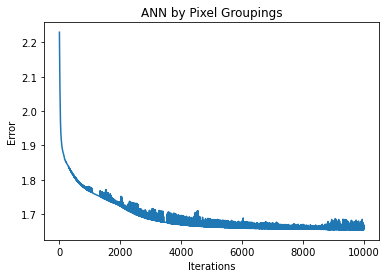

Model accuracy: 0.33


In [7]:
#Number of Epochs
NUM_EPOCHS = 10000

#Create the Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

#Convert the Y Values to a Probability Version
def to_probability_category(data, num_categories):
    output = []
    for data_entry in data:
        new_row = [0] * num_categories
        new_row[data_entry] = 1
        output.append(new_row)
    return output

y_probs = to_probability_category(classification_values,8)

data_dict = { 
    y_: y_probs,
    p1_ : spectral_values_by_pixel_grouped[0],
    p2_ : spectral_values_by_pixel_grouped[1],
    p3_ : spectral_values_by_pixel_grouped[2],
    p4_ : spectral_values_by_pixel_grouped[3],
    p5_ : spectral_values_by_pixel_grouped[4],
    p6_ : spectral_values_by_pixel_grouped[5],
    p7_ : spectral_values_by_pixel_grouped[6],
    p8_ : spectral_values_by_pixel_grouped[7],
    p9_ : spectral_values_by_pixel_grouped[8]
}


#Will Log the Errors
errors = []

#Training
for currEpoch in range(NUM_EPOCHS):
    temp, error = sess.run([optimiser, cost], feed_dict=data_dict)
    errors.append(error)
    #Percentage Counter
    if (currEpoch % 100 == 0):
        print(currEpoch / NUM_EPOCHS * 100, "%")
        


correct_classifications = sess.run(layers[-1]["activation"], feed_dict=data_dict)  

#Plotting Error
plt.plot(errors)
plt.title("ANN by Pixel Groupings")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()


#Setting up Test Data
_1, testOutput, _2, _3, testPixelGroups, _4  = load_file(DATASET_TESTING)
y_test_probs= to_probability_category(testOutput,8)
test_dict = { 
    y_: y_test_probs,
    p1_ : testPixelGroups[0],
    p2_ : testPixelGroups[1],
    p3_ : testPixelGroups[2],
    p4_ : testPixelGroups[3],
    p5_ : testPixelGroups[4],
    p6_ : testPixelGroups[5],
    p7_ : testPixelGroups[6],
    p8_ : testPixelGroups[7],
    p9_ : testPixelGroups[8]
}

#Test Data Accuracy
correct_prediction = tf.equal(tf.argmax(layers[-1]["activation"], 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Model Accuracy:',accuracy.eval(feed_dict=test_dict))



sess.close()